In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
dataset = pd.read_csv('/content/diabetes.csv')

In [11]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [12]:
print("Shape", dataset.shape)

Shape (768, 9)


In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [14]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [17]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

dataset[invalid_cols] = dataset[invalid_cols].replace(0, np.nan)

for col in invalid_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)


<ipython-input-17-4e5de52f7e45>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)


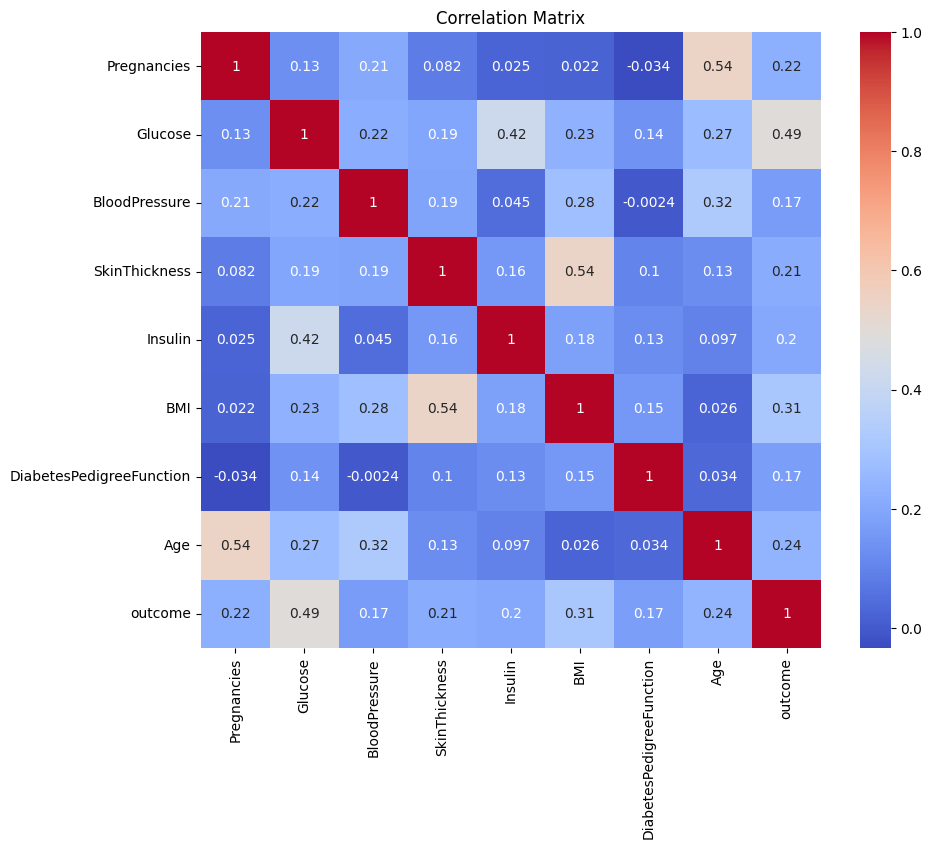

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
X = dataset.drop('outcome', axis=1)
y = dataset['outcome']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [30]:
#random forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7402597402597403


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[82 17]
 [21 34]]


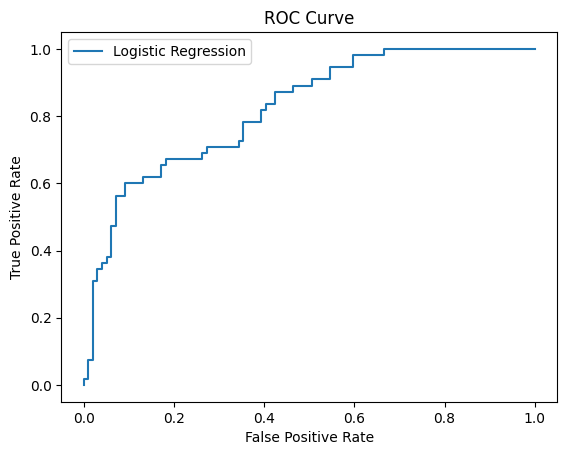

ROC AUC Score: 0.8211202938475666


In [33]:
# ROC Curve
y_probs = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

In [35]:
def evaluate_model(name, y_test, preds):
    print(f" {name} Performance:")
    print("R² Score:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("—" * 30)

In [36]:
evaluate_model("Logistic Regression", y_test, y_pred)
evaluate_model("Random Forest", y_test, rf_pred)

 Logistic Regression Performance:
R² Score: -0.074747474747475
MAE: 0.24675324675324675
RMSE: 0.496742636335202
——————————————————————————————
 Random Forest Performance:
R² Score: -0.13131313131313171
MAE: 0.2597402597402597
RMSE: 0.5096471914376255
——————————————————————————————
